<a href="https://colab.research.google.com/github/HemaP-0303/ML_LAB/blob/main/1BM22CS111_6_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Enter values for a new data point:
Feature 1: 4.5
Feature 2: 3.6
Feature 3: 2.9
Feature 4: 1

Predicted Class: Iris-versicolor


<ipython-input-19-4170d4fd6e81>:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1', len(unique_classes))


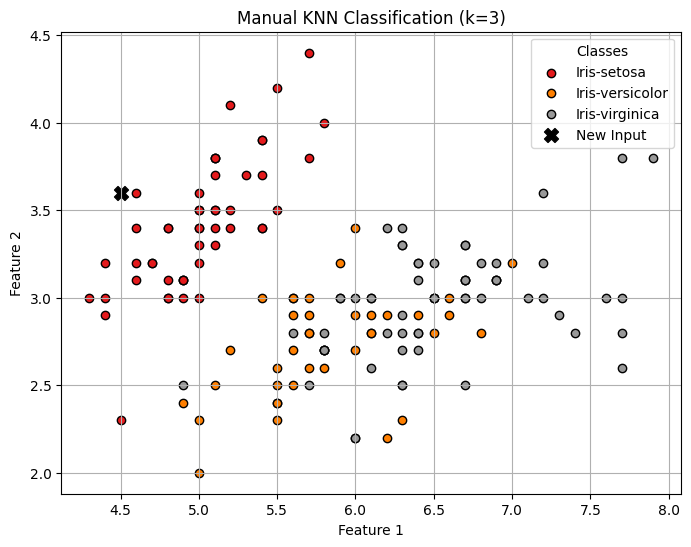

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Load dataset
df = pd.read_csv('iris.csv')  # Replace with your dataset

# Separate features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# For plotting (first 2 features only)
X_plot = X[:, :2]

# Train/test split (70% train, 30% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---- USER INPUT SECTION ----
print("\nEnter values for a new data point:")
feature1 = float(input("Feature 1: "))
feature2 = float(input("Feature 2: "))
feature3 = float(input("Feature 3: "))
feature4 = float(input("Feature 4: "))

new_input = np.array([feature1, feature2, feature3, feature4])

# ---- MANUAL KNN IMPLEMENTATION ----
k = 3  # Number of neighbors

# Calculate Euclidean distance from new input to all training points
distances = []
for i in range(len(X_train)):
    dist = np.sqrt(np.sum((X_train[i] - new_input) ** 2))
    distances.append((dist, y_train[i]))

# Sort by distance
sorted_neighbors = sorted(distances, key=lambda x: x[0])

# Pick k nearest neighbors
k_neighbors = sorted_neighbors[:k]

# Perform majority vote
k_labels = [label for _, label in k_neighbors]
predicted_label = Counter(k_labels).most_common(1)[0][0]

print(f"\nPredicted Class: {predicted_label}")

# ---- PLOT DATA + NEW POINT (Only First Two Features) ----
plt.figure(figsize=(8, 6))
unique_classes = np.unique(y)
colors = plt.cm.get_cmap('Set1', len(unique_classes))

# Plot existing data
for idx, cls in enumerate(unique_classes):
    plt.scatter(
        X_plot[y == cls, 0], X_plot[y == cls, 1],
        color=colors(idx),
        label=str(cls),
        edgecolors='k'
    )

# Plot new input point (first two features only)
plt.scatter(feature1, feature2, color='black', marker='X', s=100, label='New Input')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Manual KNN Classification (k=3)')
plt.legend(title="Classes")
plt.grid(True)
plt.show()



predicted results
['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']
confusion matrix
[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]
Correct predictions:  29
False predictions 1
Accuracy of the SVC Clasification is:  0.9666666666666667
Equation of the hyperplane: -0.431*x1 + 0.335*x2 + -0.880*x3 + -0.922*x4 + (-1.474) = 0
